In [7]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import random
import pymongo
import matplotlib.pyplot as plt

In [146]:
headers={
    'User-Agent': "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36",
    'Host':'sh.lianjia.com'
}


In [371]:
districts_pudong=['yuqiao1','beicai', 'biyun', 'caolu', 'chuansha', 'datuanzhen','geqing','gaohang','gaodong','huamu','hangtou','huinan'
          ,'jinqiao','jinyang','kangqiao','lujiazui','laogangzhen','lingangxincheng','lianyang','nichengzhen','nanmatou'
          ,'sanlin','shibo','shuyuanzhen','tangqiao','tangzhen','waigaoqiao','wanxiangzhen','weifang','xuanqiao','xinchang'
          ,'yangdong','yuanshen','yangjing','zhangjiang','zhuqiao','zhoupu']
districts_minhang=['pujiang1','xinzhuang5','chunshen','gumei','hanghua','huacao','jinhui','jinganxincheng','jinhongqiao','longbai','laominhang','maqiao','meilong','qibao','wujing'
          ,'zhuanqiao']
districts_baoshan=['dahua','dachangzhen','gongfu','gongkang','gucun','gaojing','luojing','luodian','songbao','songnan'
                  ,'shangda','tonghe','yuepu','yanghang','zhangmiao']
districts_xuhui=['changqiao','caohejing','huadongligong','huajing','hengshanlu','jianguoxilu','kangjian','longhua'
                ,'shanghainanzhan','tianlin','wantiguan','xuhuibinjiang','xujiahui','xietulu','zhiwuyuan']
districts_putuo=['changfeng1','changshoulu','caoyang','changzheng','guangxin','ganquanyichuan','taopu','wuning','wanli'
                ,'zhenguang','zhongyuanliangwancheng','zhenru']
districts_yangpu=['zhongyuan1','anshan','dongwaitan','huangxinggongyuan','kongjianglu','wujiaochang','xinjiangwancheng','zhoujiazuilu']
districts_songjiang=['chedun','jiuting','shenminbieshu','songjiangxincheng','sheshan','songjiangdaxuecheng',
                    'sijing','songjianglaocheng','xinqiao','xiaokunshan','yexie']
districts_jiading=['xinchenglu1','anting','fengzhuang','huating','jiadinglaocheng','jiadingxincheng','juyuanxinqu','jiangqiao','malu','nanxiang'
                  ,'waigang','xuxing']

districts_changning=['changning']
districts_huangpu=['huangpu']
districts_jingan=['jingan']
districts_zhabei=['zhabei']
districts_hongkou=['hongkou']
districts_qingpu=['qingpu']
districts_fengxian=['fengxian']
districts_jinshan=['jinshan']
districts_chongmin=['chongming']
districts_zhoubian=['shanghaizhoubian']

disticts_other=['changning','huangpu','jingan','zhabei','hongkou','qingpu','fengxian','jinshan','chongming','shanghaizhoubian']



In [223]:
data_list=[]
for district in districts_pudong:
   link="https://sh.lianjia.com/ershoufang/"+district
   r=requests.get(link,headers=headers)
   soup=BeautifulSoup(r.text,'lxml')
   page = int(eval(soup.find('div',{'class':'page-box house-lst-page-box'})['page-data'])['totalPage'])
   for i in range (1, page+1):
      link="https://sh.lianjia.com/ershoufang/"+ str(district) +"/pg"+ str(i)+ "/"
      r=requests.get(link,headers=headers)
      soup1=BeautifulSoup(r.text,'lxml')
      house_detail=soup1.find_all('div',class_='info clear')
      for each in house_detail:
         many_info = each.find('div', class_='houseInfo').text.strip()
         many_info=many_info.split("|")##分开
         name=many_info[0].strip(' ')##去除空格
         arrange=many_info[1].strip(' ')
         size=many_info[2].strip(' ').strip('平米')
         decoration=many_info[4].strip(' ')
         detail_info=each.find('div', class_='positionInfo').text.strip().split("-")
         build_time=detail_info[0].strip(' ')
         local_area=detail_info[1].strip(' ')
         total_price=each.find('div', class_='totalPrice').text.strip().strip('万')
         unit_price=each.find('div', class_='unitPrice').text.strip().strip('单价').strip('元/平米')
         big_area=str('浦东')
         data_list.append([name,arrange,size,total_price,unit_price,decoration,build_time,local_area,big_area])
      

In [168]:
client = pymongo.MongoClient(host='localhost', port=27017)
db = client['Housing_info']

In [353]:
len(data_list)

17051

In [266]:
data_list_2=[]
for district in districts_minhang:
   link="https://sh.lianjia.com/ershoufang/"+district
   r=requests.get(link,headers=headers)
   soup=BeautifulSoup(r.text,'lxml')
   page = int(eval(soup.find('div',{'class':'page-box house-lst-page-box'})['page-data'])['totalPage'])
   for i in range (1, page+1):
      link="https://sh.lianjia.com/ershoufang/"+ str(district) +"/pg"+ str(i)+ "/"
      r=requests.get(link,headers=headers)
      soup1=BeautifulSoup(r.text,'lxml')
      house_detail=soup1.find_all('div',class_='info clear')
      for each in house_detail:
         many_info = each.find('div', class_='houseInfo').text.strip()
         many_info=many_info.split("|")##分开
         name=many_info[0].strip(' ')##去除空格
         arrange=many_info[1].strip(' ')
         size=many_info[2].strip(' ').strip('平米')
         decoration=many_info[4].strip(' ')
         detail_info=each.find('div', class_='positionInfo').text.strip().split("-")
         build_time=detail_info[0].strip(' ')
         local_area=detail_info[1].strip(' ')
         total_price=each.find('div', class_='totalPrice').text.strip().strip('万')
         unit_price=each.find('div', class_='unitPrice').text.strip().strip('单价').strip('元/平米')
         big_area=str('闵行')
         data_list_2.append([name,arrange,size,total_price,unit_price,decoration,build_time,local_area,big_area])

In [283]:
len(data_list_2) 

7221

In [268]:
data_list_3=[]
for district in districts_baoshan:
   link="https://sh.lianjia.com/ershoufang/"+district
   r=requests.get(link,headers=headers)
   soup=BeautifulSoup(r.text,'lxml')
   page = int(eval(soup.find('div',{'class':'page-box house-lst-page-box'})['page-data'])['totalPage'])
   for i in range (1, page+1):
      link="https://sh.lianjia.com/ershoufang/"+ str(district) +"/pg"+ str(i)+ "/"
      r=requests.get(link,headers=headers)
      soup1=BeautifulSoup(r.text,'lxml')
      house_detail=soup1.find_all('div',class_='info clear')
      for each in house_detail:
         many_info = each.find('div', class_='houseInfo').text.strip()
         many_info=many_info.split("|")##分开
         name=many_info[0].strip(' ')##去除空格
         arrange=many_info[1].strip(' ')
         size=many_info[2].strip(' ').strip('平米')
         decoration=many_info[4].strip(' ')
         detail_info=each.find('div', class_='positionInfo').text.strip().split("-")
         build_time=detail_info[0].strip(' ')
         local_area=detail_info[1].strip(' ')
         total_price=each.find('div', class_='totalPrice').text.strip().strip('万')
         unit_price=each.find('div', class_='unitPrice').text.strip().strip('单价').strip('元/平米')
         big_area=str('宝山')
         data_list_3.append([name,arrange,size,total_price,unit_price,decoration,build_time,local_area,big_area])

In [269]:
len(data_list_3)

5613

In [270]:
data_list_4=[]
for district in districts_xuhui:
   link="https://sh.lianjia.com/ershoufang/"+district
   r=requests.get(link,headers=headers)
   soup=BeautifulSoup(r.text,'lxml')
   page = int(eval(soup.find('div',{'class':'page-box house-lst-page-box'})['page-data'])['totalPage'])
   for i in range (1, page+1):
      link="https://sh.lianjia.com/ershoufang/"+ str(district) +"/pg"+ str(i)+ "/"
      r=requests.get(link,headers=headers)
      soup1=BeautifulSoup(r.text,'lxml')
      house_detail=soup1.find_all('div',class_='info clear')
      for each in house_detail:
         many_info = each.find('div', class_='houseInfo').text.strip()
         many_info=many_info.split("|")##分开
         name=many_info[0].strip(' ')##去除空格
         arrange=many_info[1].strip(' ')
         size=many_info[2].strip(' ').strip('平米')
         decoration=many_info[4].strip(' ')
         detail_info=each.find('div', class_='positionInfo').text.strip().split("-")
         build_time=detail_info[0].strip(' ')
         local_area=detail_info[1].strip(' ')
         total_price=each.find('div', class_='totalPrice').text.strip().strip('万')
         unit_price=each.find('div', class_='unitPrice').text.strip().strip('单价').strip('元/平米')
         big_area=str('徐汇')
         data_list_4.append([name,arrange,size,total_price,unit_price,decoration,build_time,local_area,big_area])

In [271]:
len(data_list_4)

3962

In [354]:
data_list_5=[]
for district in districts_putuo:
   link="https://sh.lianjia.com/ershoufang/"+district
   r=requests.get(link,headers=headers)
   soup=BeautifulSoup(r.text,'lxml')
   page = int(eval(soup.find('div',{'class':'page-box house-lst-page-box'})['page-data'])['totalPage'])
   for i in range (1, page+1):
      link="https://sh.lianjia.com/ershoufang/"+ str(district) +"/pg"+ str(i)+ "/"
      r=requests.get(link,headers=headers)
      soup1=BeautifulSoup(r.text,'lxml')
      house_detail=soup1.find_all('div',class_='info clear')
      for each in house_detail:
         many_info = each.find('div', class_='houseInfo').text.strip()
         many_info=many_info.split("|")##分开
         name=many_info[0].strip(' ')##去除空格
         arrange=many_info[1].strip(' ')
         size=many_info[2].strip(' ').strip('平米')
         decoration=many_info[4].strip(' ')
         detail_info=each.find('div', class_='positionInfo').text.strip().split("-")
         build_time=detail_info[0].strip(' ')
         local_area=detail_info[1].strip(' ')
         total_price=each.find('div', class_='totalPrice').text.strip().strip('万')
         unit_price=each.find('div', class_='unitPrice').text.strip().strip('单价').strip('元/平米')
         big_area=str('普陀')
         data_list_5.append([name,arrange,size,total_price,unit_price,decoration,build_time,local_area,big_area])

In [355]:
len(data_list_5)

4214

In [359]:
data_list_6=[]
for district in districts_yangpu:
   link="https://sh.lianjia.com/ershoufang/"+district
   r=requests.get(link,headers=headers)
   soup=BeautifulSoup(r.text,'lxml')
   page = int(eval(soup.find('div',{'class':'page-box house-lst-page-box'})['page-data'])['totalPage'])
   for i in range (1, page+1):
      link="https://sh.lianjia.com/ershoufang/"+ str(district) +"/pg"+ str(i)+ "/"
      r=requests.get(link,headers=headers)
      soup1=BeautifulSoup(r.text,'lxml')
      house_detail=soup1.find_all('div',class_='info clear')
      for each in house_detail:
         many_info = each.find('div', class_='houseInfo').text.strip()
         many_info=many_info.split("|")##分开
         name=many_info[0].strip(' ')##去除空格
         arrange=many_info[1].strip(' ')
         size=many_info[2].strip(' ').strip('平米')
         decoration=many_info[4].strip(' ')
         detail_info=each.find('div', class_='positionInfo').text.strip().split("-")
         build_time=detail_info[0].strip(' ')
         local_area=detail_info[1].strip(' ')
         total_price=each.find('div', class_='totalPrice').text.strip().strip('万')
         unit_price=each.find('div', class_='unitPrice').text.strip().strip('单价').strip('元/平米')
         big_area=str('杨浦')
         data_list_6.append([name,arrange,size,total_price,unit_price,decoration,build_time,local_area,big_area])

In [360]:
len(data_list_6)

4251

In [361]:
data_list_7=[]
for district in districts_changning:
   link="https://sh.lianjia.com/ershoufang/"+district
   r=requests.get(link,headers=headers)
   soup=BeautifulSoup(r.text,'lxml')
   page = int(eval(soup.find('div',{'class':'page-box house-lst-page-box'})['page-data'])['totalPage'])
   for i in range (1, page+1):
      link="https://sh.lianjia.com/ershoufang/"+ str(district) +"/pg"+ str(i)+ "/"
      r=requests.get(link,headers=headers)
      soup1=BeautifulSoup(r.text,'lxml')
      house_detail=soup1.find_all('div',class_='info clear')
      for each in house_detail:
         many_info = each.find('div', class_='houseInfo').text.strip()
         many_info=many_info.split("|")##分开
         name=many_info[0].strip(' ')##去除空格
         arrange=many_info[1].strip(' ')
         size=many_info[2].strip(' ').strip('平米')
         decoration=many_info[4].strip(' ')
         detail_info=each.find('div', class_='positionInfo').text.strip().split("-")
         build_time=detail_info[0].strip(' ')
         local_area=detail_info[1].strip(' ')
         total_price=each.find('div', class_='totalPrice').text.strip().strip('万')
         unit_price=each.find('div', class_='unitPrice').text.strip().strip('单价').strip('元/平米')
         big_area=str('长宁')
         data_list_7.append([name,arrange,size,total_price,unit_price,decoration,build_time,local_area,big_area])

In [362]:
len(data_list_7)

2960

In [372]:
data_list_8=[]
for district in districts_songjiang:
   link="https://sh.lianjia.com/ershoufang/"+district
   r=requests.get(link,headers=headers)
   soup=BeautifulSoup(r.text,'lxml')
   page = int(eval(soup.find('div',{'class':'page-box house-lst-page-box'})['page-data'])['totalPage'])
   for i in range (1, page+1):
      link="https://sh.lianjia.com/ershoufang/"+ str(district) +"/pg"+ str(i)+ "/"
      r=requests.get(link,headers=headers)
      soup1=BeautifulSoup(r.text,'lxml')
      house_detail=soup1.find_all('div',class_='info clear')
      for each in house_detail:
         many_info = each.find('div', class_='houseInfo').text.strip()
         many_info=many_info.split("|")##分开
         name=many_info[0].strip(' ')##去除空格
         arrange=many_info[1].strip(' ')
         size=many_info[2].strip(' ').strip('平米')
         decoration=many_info[4].strip(' ')
         detail_info=each.find('div', class_='positionInfo').text.strip().split("-")
         build_time=detail_info[0].strip(' ')
         local_area=detail_info[1].strip(' ')
         total_price=each.find('div', class_='totalPrice').text.strip().strip('万')
         unit_price=each.find('div', class_='unitPrice').text.strip().strip('单价').strip('元/平米')
         big_area=str('松江')
         data_list_8.append([name,arrange,size,total_price,unit_price,decoration,build_time,local_area,big_area])

In [373]:
len(data_list_8)

4542

In [374]:
data_list_9=[]
for district in districts_jiading:
   link="https://sh.lianjia.com/ershoufang/"+district
   r=requests.get(link,headers=headers)
   soup=BeautifulSoup(r.text,'lxml')
   page = int(eval(soup.find('div',{'class':'page-box house-lst-page-box'})['page-data'])['totalPage'])
   for i in range (1, page+1):
      link="https://sh.lianjia.com/ershoufang/"+ str(district) +"/pg"+ str(i)+ "/"
      r=requests.get(link,headers=headers)
      soup1=BeautifulSoup(r.text,'lxml')
      house_detail=soup1.find_all('div',class_='info clear')
      for each in house_detail:
         many_info = each.find('div', class_='houseInfo').text.strip()
         many_info=many_info.split("|")##分开
         name=many_info[0].strip(' ')##去除空格
         arrange=many_info[1].strip(' ')
         size=many_info[2].strip(' ').strip('平米')
         decoration=many_info[4].strip(' ')
         detail_info=each.find('div', class_='positionInfo').text.strip().split("-")
         build_time=detail_info[0].strip(' ')
         local_area=detail_info[1].strip(' ')
         total_price=each.find('div', class_='totalPrice').text.strip().strip('万')
         unit_price=each.find('div', class_='unitPrice').text.strip().strip('单价').strip('元/平米')
         big_area=str('嘉定')
         data_list_9.append([name,arrange,size,total_price,unit_price,decoration,build_time,local_area,big_area])

In [375]:
len(data_list_9)

3838

In [376]:
data_list_10=[]
for district in districts_huangpu:
   link="https://sh.lianjia.com/ershoufang/"+district
   r=requests.get(link,headers=headers)
   soup=BeautifulSoup(r.text,'lxml')
   page = int(eval(soup.find('div',{'class':'page-box house-lst-page-box'})['page-data'])['totalPage'])
   for i in range (1, page+1):
      link="https://sh.lianjia.com/ershoufang/"+ str(district) +"/pg"+ str(i)+ "/"
      r=requests.get(link,headers=headers)
      soup1=BeautifulSoup(r.text,'lxml')
      house_detail=soup1.find_all('div',class_='info clear')
      for each in house_detail:
         many_info = each.find('div', class_='houseInfo').text.strip()
         many_info=many_info.split("|")##分开
         name=many_info[0].strip(' ')##去除空格
         arrange=many_info[1].strip(' ')
         size=many_info[2].strip(' ').strip('平米')
         decoration=many_info[4].strip(' ')
         detail_info=each.find('div', class_='positionInfo').text.strip().split("-")
         build_time=detail_info[0].strip(' ')
         local_area=detail_info[1].strip(' ')
         total_price=each.find('div', class_='totalPrice').text.strip().strip('万')
         unit_price=each.find('div', class_='unitPrice').text.strip().strip('单价').strip('元/平米')
         big_area=str('黄浦')
         data_list_10.append([name,arrange,size,total_price,unit_price,decoration,build_time,local_area,big_area])

In [377]:
len(data_list_10)

2039

In [378]:
data_list_11=[]
for district in districts_jingan:
   link="https://sh.lianjia.com/ershoufang/"+district
   r=requests.get(link,headers=headers)
   soup=BeautifulSoup(r.text,'lxml')
   page = int(eval(soup.find('div',{'class':'page-box house-lst-page-box'})['page-data'])['totalPage'])
   for i in range (1, page+1):
      link="https://sh.lianjia.com/ershoufang/"+ str(district) +"/pg"+ str(i)+ "/"
      r=requests.get(link,headers=headers)
      soup1=BeautifulSoup(r.text,'lxml')
      house_detail=soup1.find_all('div',class_='info clear')
      for each in house_detail:
         many_info = each.find('div', class_='houseInfo').text.strip()
         many_info=many_info.split("|")##分开
         name=many_info[0].strip(' ')##去除空格
         arrange=many_info[1].strip(' ')
         size=many_info[2].strip(' ').strip('平米')
         decoration=many_info[4].strip(' ')
         detail_info=each.find('div', class_='positionInfo').text.strip().split("-")
         build_time=detail_info[0].strip(' ')
         local_area=detail_info[1].strip(' ')
         total_price=each.find('div', class_='totalPrice').text.strip().strip('万')
         unit_price=each.find('div', class_='unitPrice').text.strip().strip('单价').strip('元/平米')
         big_area=str('静安')
         data_list_11.append([name,arrange,size,total_price,unit_price,decoration,build_time,local_area,big_area])

In [379]:
len(data_list_11)

1445

In [380]:
data_list_12=[]
for district in districts_zhabei:
   link="https://sh.lianjia.com/ershoufang/"+district
   r=requests.get(link,headers=headers)
   soup=BeautifulSoup(r.text,'lxml')
   page = int(eval(soup.find('div',{'class':'page-box house-lst-page-box'})['page-data'])['totalPage'])
   for i in range (1, page+1):
      link="https://sh.lianjia.com/ershoufang/"+ str(district) +"/pg"+ str(i)+ "/"
      r=requests.get(link,headers=headers)
      soup1=BeautifulSoup(r.text,'lxml')
      house_detail=soup1.find_all('div',class_='info clear')
      for each in house_detail:
         many_info = each.find('div', class_='houseInfo').text.strip()
         many_info=many_info.split("|")##分开
         name=many_info[0].strip(' ')##去除空格
         arrange=many_info[1].strip(' ')
         size=many_info[2].strip(' ').strip('平米')
         decoration=many_info[4].strip(' ')
         detail_info=each.find('div', class_='positionInfo').text.strip().split("-")
         build_time=detail_info[0].strip(' ')
         local_area=detail_info[1].strip(' ')
         total_price=each.find('div', class_='totalPrice').text.strip().strip('万')
         unit_price=each.find('div', class_='unitPrice').text.strip().strip('单价').strip('元/平米')
         big_area=str('闸北')
         data_list_12.append([name,arrange,size,total_price,unit_price,decoration,build_time,local_area,big_area])

In [381]:
len(data_list_12)

2585

In [382]:
data_list_13=[]
for district in districts_hongkou:
   link="https://sh.lianjia.com/ershoufang/"+district
   r=requests.get(link,headers=headers)
   soup=BeautifulSoup(r.text,'lxml')
   page = int(eval(soup.find('div',{'class':'page-box house-lst-page-box'})['page-data'])['totalPage'])
   for i in range (1, page+1):
      link="https://sh.lianjia.com/ershoufang/"+ str(district) +"/pg"+ str(i)+ "/"
      r=requests.get(link,headers=headers)
      soup1=BeautifulSoup(r.text,'lxml')
      house_detail=soup1.find_all('div',class_='info clear')
      for each in house_detail:
         many_info = each.find('div', class_='houseInfo').text.strip()
         many_info=many_info.split("|")##分开
         name=many_info[0].strip(' ')##去除空格
         arrange=many_info[1].strip(' ')
         size=many_info[2].strip(' ').strip('平米')
         decoration=many_info[4].strip(' ')
         detail_info=each.find('div', class_='positionInfo').text.strip().split("-")
         build_time=detail_info[0].strip(' ')
         local_area=detail_info[1].strip(' ')
         total_price=each.find('div', class_='totalPrice').text.strip().strip('万')
         unit_price=each.find('div', class_='unitPrice').text.strip().strip('单价').strip('元/平米')
         big_area=str('虹口')
         data_list_13.append([name,arrange,size,total_price,unit_price,decoration,build_time,local_area,big_area])

In [383]:
len(data_list_13)

2426

In [384]:
data_list_14=[]
for district in districts_qingpu:
   link="https://sh.lianjia.com/ershoufang/"+district
   r=requests.get(link,headers=headers)
   soup=BeautifulSoup(r.text,'lxml')
   page = int(eval(soup.find('div',{'class':'page-box house-lst-page-box'})['page-data'])['totalPage'])
   for i in range (1, page+1):
      link="https://sh.lianjia.com/ershoufang/"+ str(district) +"/pg"+ str(i)+ "/"
      r=requests.get(link,headers=headers)
      soup1=BeautifulSoup(r.text,'lxml')
      house_detail=soup1.find_all('div',class_='info clear')
      for each in house_detail:
         many_info = each.find('div', class_='houseInfo').text.strip()
         many_info=many_info.split("|")##分开
         name=many_info[0].strip(' ')##去除空格
         arrange=many_info[1].strip(' ')
         size=many_info[2].strip(' ').strip('平米')
         decoration=many_info[4].strip(' ')
         detail_info=each.find('div', class_='positionInfo').text.strip().split("-")
         build_time=detail_info[0].strip(' ')
         local_area=detail_info[1].strip(' ')
         total_price=each.find('div', class_='totalPrice').text.strip().strip('万')
         unit_price=each.find('div', class_='unitPrice').text.strip().strip('单价').strip('元/平米')
         big_area=str('青浦')
         data_list_14.append([name,arrange,size,total_price,unit_price,decoration,build_time,local_area,big_area])

In [385]:
len(data_list_14)

2374

In [386]:
data_list_15=[]
for district in districts_fengxian:
   link="https://sh.lianjia.com/ershoufang/"+district
   r=requests.get(link,headers=headers)
   soup=BeautifulSoup(r.text,'lxml')
   page = int(eval(soup.find('div',{'class':'page-box house-lst-page-box'})['page-data'])['totalPage'])
   for i in range (1, page+1):
      link="https://sh.lianjia.com/ershoufang/"+ str(district) +"/pg"+ str(i)+ "/"
      r=requests.get(link,headers=headers)
      soup1=BeautifulSoup(r.text,'lxml')
      house_detail=soup1.find_all('div',class_='info clear')
      for each in house_detail:
         many_info = each.find('div', class_='houseInfo').text.strip()
         many_info=many_info.split("|")##分开
         name=many_info[0].strip(' ')##去除空格
         arrange=many_info[1].strip(' ')
         size=many_info[2].strip(' ').strip('平米')
         decoration=many_info[4].strip(' ')
         detail_info=each.find('div', class_='positionInfo').text.strip().split("-")
         build_time=detail_info[0].strip(' ')
         local_area=detail_info[1].strip(' ')
         total_price=each.find('div', class_='totalPrice').text.strip().strip('万')
         unit_price=each.find('div', class_='unitPrice').text.strip().strip('单价').strip('元/平米')
         big_area=str('奉贤')
         data_list_15.append([name,arrange,size,total_price,unit_price,decoration,build_time,local_area,big_area])

In [387]:
len(data_list_15)

2191

In [388]:
data_list_16=[]
for district in districts_jinshan:
   link="https://sh.lianjia.com/ershoufang/"+district
   r=requests.get(link,headers=headers)
   soup=BeautifulSoup(r.text,'lxml')
   page = int(eval(soup.find('div',{'class':'page-box house-lst-page-box'})['page-data'])['totalPage'])
   for i in range (1, page+1):
      link="https://sh.lianjia.com/ershoufang/"+ str(district) +"/pg"+ str(i)+ "/"
      r=requests.get(link,headers=headers)
      soup1=BeautifulSoup(r.text,'lxml')
      house_detail=soup1.find_all('div',class_='info clear')
      for each in house_detail:
         many_info = each.find('div', class_='houseInfo').text.strip()
         many_info=many_info.split("|")##分开
         name=many_info[0].strip(' ')##去除空格
         arrange=many_info[1].strip(' ')
         size=many_info[2].strip(' ').strip('平米')
         decoration=many_info[4].strip(' ')
         detail_info=each.find('div', class_='positionInfo').text.strip().split("-")
         build_time=detail_info[0].strip(' ')
         local_area=detail_info[1].strip(' ')
         total_price=each.find('div', class_='totalPrice').text.strip().strip('万')
         unit_price=each.find('div', class_='unitPrice').text.strip().strip('单价').strip('元/平米')
         big_area=str('金山')
         data_list_16.append([name,arrange,size,total_price,unit_price,decoration,build_time,local_area,big_area])

In [389]:
len(data_list_16)

189

In [391]:
data_list_17=[]
for district in districts_chongmin:
   link="https://sh.lianjia.com/ershoufang/"+district
   r=requests.get(link,headers=headers)
   soup=BeautifulSoup(r.text,'lxml')
   page = int(eval(soup.find('div',{'class':'page-box house-lst-page-box'})['page-data'])['totalPage'])
   for i in range (1, page+1):
      link="https://sh.lianjia.com/ershoufang/"+ str(district) +"/pg"+ str(i)+ "/"
      r=requests.get(link,headers=headers)
      soup1=BeautifulSoup(r.text,'lxml')
      house_detail=soup1.find_all('div',class_='info clear')
      for each in house_detail:
         many_info = each.find('div', class_='houseInfo').text.strip()
         many_info=many_info.split("|")##分开
         name=many_info[0].strip(' ')##去除空格
         arrange=many_info[1].strip(' ')
         size=many_info[2].strip(' ').strip('平米')
         decoration=many_info[4].strip(' ')
         detail_info=each.find('div', class_='positionInfo').text.strip().split("-")
         build_time=detail_info[0].strip(' ')
         local_area=detail_info[1].strip(' ')
         total_price=each.find('div', class_='totalPrice').text.strip().strip('万')
         unit_price=each.find('div', class_='unitPrice').text.strip().strip('单价').strip('元/平米')
         big_area=str('崇明')
         data_list_17.append([name,arrange,size,total_price,unit_price,decoration,build_time,local_area,big_area])

In [392]:
len(data_list_17)

134

In [393]:
data_list_18=[]
for district in districts_zhoubian:
   link="https://sh.lianjia.com/ershoufang/"+district
   r=requests.get(link,headers=headers)
   soup=BeautifulSoup(r.text,'lxml')
   page = int(eval(soup.find('div',{'class':'page-box house-lst-page-box'})['page-data'])['totalPage'])
   for i in range (1, page+1):
      link="https://sh.lianjia.com/ershoufang/"+ str(district) +"/pg"+ str(i)+ "/"
      r=requests.get(link,headers=headers)
      soup1=BeautifulSoup(r.text,'lxml')
      house_detail=soup1.find_all('div',class_='info clear')
      for each in house_detail:
         many_info = each.find('div', class_='houseInfo').text.strip()
         many_info=many_info.split("|")##分开
         name=many_info[0].strip(' ')##去除空格
         arrange=many_info[1].strip(' ')
         size=many_info[2].strip(' ').strip('平米')
         decoration=many_info[4].strip(' ')
         detail_info=each.find('div', class_='positionInfo').text.strip().split("-")
         build_time=detail_info[0].strip(' ')
         local_area=detail_info[1].strip(' ')
         total_price=each.find('div', class_='totalPrice').text.strip().strip('万')
         unit_price=each.find('div', class_='unitPrice').text.strip().strip('单价').strip('元/平米')
         big_area=str('上海周边')
         data_list_18.append([name,arrange,size,total_price,unit_price,decoration,build_time,local_area,big_area])

In [394]:
len(data_list_18)

115

In [398]:
##合并
a=pd.DataFrame(data_list)
b=pd.DataFrame(data_list_2)
c=pd.DataFrame(data_list_3)
d=pd.DataFrame(data_list_4)
e=pd.DataFrame(data_list_5)
f=pd.DataFrame(data_list_6)
g=pd.DataFrame(data_list_7)
h=pd.DataFrame(data_list_8)
i=pd.DataFrame(data_list_9)
j=pd.DataFrame(data_list_10)
k=pd.DataFrame(data_list_11)
l=pd.DataFrame(data_list_12)
m=pd.DataFrame(data_list_13)
n=pd.DataFrame(data_list_14)
o=pd.DataFrame(data_list_15)
p=pd.DataFrame(data_list_16)
q=pd.DataFrame(data_list_17)
r=pd.DataFrame(data_list_18)
data_list_all=a.append(b).append(c).append(d).append(e).append(f).append(g).append(h).append(i).append(j).append(k).append(l).append(m).append(n).append(o).append(p).append(q).append(r)


In [399]:
len(data_list_all)




67150

In [406]:
data_list_all

,0,1,2,3,4,5,6,7,8
0,地杰国际城E欧泊时光,2室2厅,100.61,568,56456,精装,中楼层(共26层)2007年建板楼,御桥,浦东
1,京浦小区,2室1厅,52.49,280,53344,简装,高楼层(共6层)1995年建板楼,御桥,浦东
2,御桥花园,2室1厅,62.81,388,61774,简装,高楼层(共5层)1996年建板楼,御桥,浦东
3,绿洲康城亲水湾(东区),2室2厅,89.18,430,48218,精装,高楼层(共15层)2010年建板楼,御桥,浦东
4,御桥花园,2室2厅,65,380,58462,简装,中楼层(共5层)1996年建板楼,御桥,浦东
5,地杰国际城E欧泊时光,2室2厅,102.95,650,63138,精装,中楼层(共26层)2007年建板楼,御桥,浦东
6,康桥花园,2室1厅,72.84,295,40500,精装,中楼层(共6层)1995年建板楼,御桥,浦东
7,民星苑,3室1厅,74,443,59865,精装,高楼层(共6层)1997年建板楼,御桥,浦东
8,绿洲康城亲水湾(中央区),2室2厅,90.9,485,53356,精装,低楼层(共26层)2012年建板楼,御桥,浦东
9,万科海上传奇(三期),3室2厅,90,680,75556,精装,高楼层(共20层)板楼,御桥,浦东


In [415]:
data_list_all=np.array(data_list_all)
data_list_all=data_list_all.tolist()

In [518]:
##存入 mongodb
housing_data = db.housing_data
for each in data_list_all:
   housing_data.insert_one({
    "楼盘名称":each[0],
    "房型":each[1],
    "面积":each[2],
    "总价（万）":float(each[3]),
    "单价（元/平米）":float(each[4]),
    "装修":each[5],
    "状况":each[6],
    "具体地区":each[7],
    "所属区":each[8],
        
}
)

In [ ]:
##分析时刻

In [14]:
client = pymongo.MongoClient(host='localhost', port=27017)
db =client.Housing_info
table=db['housing_data']
data_all=pd.DataFrame(list(table.find()))
data_all

,_id,具体地区,单价（元/平米）,总价（万）,房型,所属区,楼盘名称,状况,装修,面积
0,5cc34ff1c15b9b2cd84d4f9b,御桥,56456.0,568.0,2室2厅,浦东,地杰国际城E欧泊时光,中楼层(共26层)2007年建板楼,精装,100.61
1,5cc34ff1c15b9b2cd84d4f9c,御桥,53344.0,280.0,2室1厅,浦东,京浦小区,高楼层(共6层)1995年建板楼,简装,52.49
2,5cc34ff1c15b9b2cd84d4f9d,御桥,61774.0,388.0,2室1厅,浦东,御桥花园,高楼层(共5层)1996年建板楼,简装,62.81
3,5cc34ff1c15b9b2cd84d4f9e,御桥,48218.0,430.0,2室2厅,浦东,绿洲康城亲水湾(东区),高楼层(共15层)2010年建板楼,精装,89.18
4,5cc34ff1c15b9b2cd84d4f9f,御桥,58462.0,380.0,2室2厅,浦东,御桥花园,中楼层(共5层)1996年建板楼,简装,65
5,5cc34ff1c15b9b2cd84d4fa0,御桥,63138.0,650.0,2室2厅,浦东,地杰国际城E欧泊时光,中楼层(共26层)2007年建板楼,精装,102.95
6,5cc34ff1c15b9b2cd84d4fa1,御桥,40500.0,295.0,2室1厅,浦东,康桥花园,中楼层(共6层)1995年建板楼,精装,72.84
7,5cc34ff1c15b9b2cd84d4fa2,御桥,59865.0,443.0,3室1厅,浦东,民星苑,高楼层(共6层)1997年建板楼,精装,74
8,5cc34ff1c15b9b2cd84d4fa3,御桥,53356.0,485.0,2室2厅,浦东,绿洲康城亲水湾(中央区),低楼层(共26层)2012年建板楼,精装,90.9
9,5cc34ff1c15b9b2cd84d4fa4,御桥,75556.0,680.0,3室2厅,浦东,万科海上传奇(三期),高楼层(共20层)板楼,精装,90


In [15]:
def status(x) : 
    return pd.Series([x.count(),x.min(),x.idxmin(),x.quantile(.25),x.median(),
                      x.quantile(.75),x.mean(),x.max(),x.idxmax(),x.mad(),x.var(),
                      x.std(),x.skew(),x.kurt()],index=['总数','最小值','最小值位置','25%分位数',
                    '中位数','75%分位数','均值','最大值','最大值位数','平均绝对偏差','方差','标准差','偏度','峰度'])


In [16]:
##单价平均价格
unit_price=[]
new=data_all["单价（元/平米）"]
for each in (new):
  each=int(each)
  unit_price.append(each)
unit_price=pd.DataFrame(unit_price)
pd.set_option('display.float_format',lambda x : '%.2f' % x)
pd.DataFrame(status(unit_price[0]))

,0
总数,67419.00
最小值,4693.00
最小值位置,67363.00
25%分位数,37148.00
中位数,50261.00
75%分位数,65820.50
均值,53809.16
最大值,356655.00
最大值位数,59535.00
平均绝对偏差,17913.46


Text(0.5, 1.0, 'Unit price distribution')

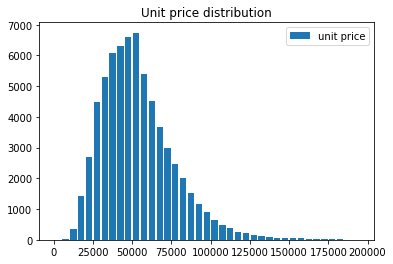

In [17]:
unit_price=[]
new=data_all["单价（元/平米）"]
for each in (new):##倒序 从头开始
  each=int(each)
  unit_price.append(each)
bins = np.arange(0, 200000, 5000)
plt.hist(unit_price, bins, histtype='bar', label='unit price',rwidth=0.8)
plt.legend()
plt.title('Unit price distribution')

Text(0.5, 1.0, 'Distribution of the size for purchasing')

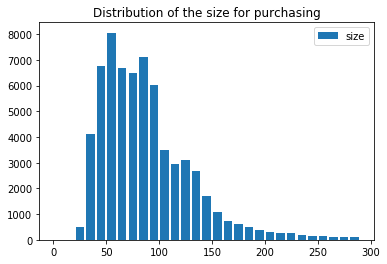

In [18]:
##面积分布
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
 
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
 
    return False
unit_price=[]
new=data_all["面积"]
for each in (new):##倒序 从头开始
  if is_number(each)==False:
    continue
  else: 
    each=float(each)
    unit_price.append(each)
bins = np.arange(0, 300, 10)
plt.hist(unit_price, bins, histtype='bar', label='size',rwidth=0.8)
plt.legend()
plt.title('Distribution of the size for purchasing')


In [19]:
x_axis=["浦东","闵行","宝山","徐汇","普陀","杨浦","长宁","松江","嘉定","黄浦","静安","闸北","虹口","青浦","奉贤","金山","崇明","上海周边"]
districts_unit=[]


In [20]:
from matplotlib.font_manager import *
myfont = FontProperties(fname='/home/jason/Downloads/simhei.ttf')##改中文字体，晕。。

In [21]:
for each in x_axis:
    hh_unit=data_all.loc[data_all["所属区"] == each]["单价（元/平米）"]
    districts_unit.append(hh_unit.mean())

In [22]:
frame_districts=pd.DataFrame(data=districts_unit,columns=['单价'])

In [23]:
frame_districts["区"]=x_axis###添加一行

In [24]:
frame_districts=frame_districts.sort_values(by="单价", ascending=False)

Text(0, 0.5, 'districts')

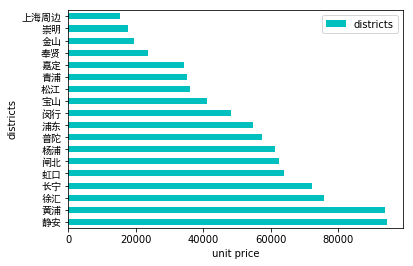

In [25]:
ax=frame_districts.plot(x='区',y='单价',kind='barh',color = 'c')
ax.set_yticklabels(frame_districts["区"],fontproperties=myfont)
ax.legend(['districts'])
ax.set_xlabel("unit price")
ax.set_ylabel("districts")


In [26]:
frame_districts

,单价,区
10,94533.67,静安
9,93974.52,黄浦
3,75822.61,徐汇
6,72278.65,长宁
12,64000.30,虹口
11,62387.16,闸北
5,61379.16,杨浦
4,57432.75,普陀
0,54676.57,浦东
1,48299.03,闵行


In [27]:
districts_unit=[]
x_axis_pudong=['北蔡','碧云','曹路','川沙','大团镇','合庆','高行','高东','花木','航头','惠南','金桥','金杨','康桥','陆家嘴','老港镇','临港新城','联洋','泥城镇','南码头','三林','世博','书院镇','塘桥','唐镇','外高桥','万祥镇','潍坊','宣桥','新场','御桥'
              ,'杨东','源深','洋泾','张江','祝桥','周浦']
for each in x_axis_pudong:
    hh_unit=data_all.loc[data_all["具体地区"] == each]["单价（元/平米）"]
    districts_unit.append(hh_unit.mean())
frame_districts=pd.DataFrame(data=districts_unit,columns=['单价'])
frame_districts["地区"]=x_axis_pudong###添加一行
frame_districts=frame_districts.sort_values(by="单价", ascending=False)
frame_districts

,单价,地区
32,94477.52,源深
17,94037.23,联洋
14,87933.59,陆家嘴
27,86323.15,潍坊
1,85913.49,碧云
8,84384.82,花木
31,81274.17,杨东
33,74567.12,洋泾
23,69158.09,塘桥
34,61280.99,张江


Text(0, 0.5, 'area')

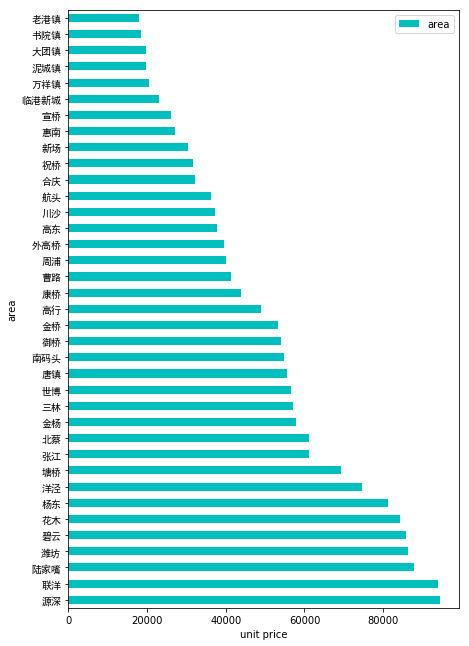

In [28]:
ax=frame_districts.plot(x='地区',y='单价',kind='barh',color = 'c',figsize=(7,11),linewidth=0.01)
ax.set_yticklabels(frame_districts["地区"],fontproperties=myfont)
ax.legend(['area'])
ax.set_xlabel("unit price")
ax.set_ylabel("area")



In [873]:

frame_districts

,单价,地区
32,94477.52,源深
17,94037.23,联洋
14,87933.59,陆家嘴
27,86323.15,潍坊
1,85913.49,碧云
8,84384.82,花木
31,81274.17,杨东
33,74567.12,洋泾
23,69158.09,塘桥
34,61280.99,张江


In [ ]:
##############数量

In [29]:
number_house=[]
for each in x_axis:
    hh_unit=data_all.loc[data_all["所属区"] == each]
    a=len(hh_unit)
    number_house.append(a)
frame_number_house=pd.DataFrame(data=number_house,columns=['房屋数'])
frame_number_house["区"]=x_axis
frame_number_house=frame_number_house.sort_values(by="房屋数", ascending=False)

In [30]:
frame_number_house

,房屋数,区
0,17320,浦东
1,7221,闵行
2,5613,宝山
7,4542,松江
5,4251,杨浦
4,4214,普陀
3,3962,徐汇
8,3838,嘉定
6,2960,长宁
11,2585,闸北


Text(0, 0.5, 'districts')

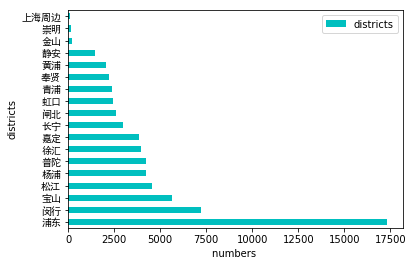

In [906]:
ax=frame_number_house.plot(x='区',y='房屋数',kind='barh',color = 'c')
ax.set_yticklabels(frame_number_house["区"],fontproperties=myfont)
ax.legend(['districts'])
ax.set_xlabel("numbers ")
ax.set_ylabel("districts")

In [907]:
###pudong
number_house=[]
for each in x_axis_pudong:
    hh_unit=data_all.loc[data_all["具体地区"] == each]
    a=len(hh_unit)
    number_house.append(a)
frame_number_house=pd.DataFrame(data=number_house,columns=['房屋数'])
frame_number_house["区"]=x_axis_pudong
frame_number_house=frame_number_house.sort_values(by="房屋数", ascending=False)

In [908]:
frame_number_house

,房屋数,区
11,1757,金桥
0,1266,北蔡
20,1219,三林
3,974,川沙
10,966,惠南
12,870,金杨
21,827,世博
34,747,张江
14,718,陆家嘴
36,661,周浦


Text(0, 0.5, 'area')

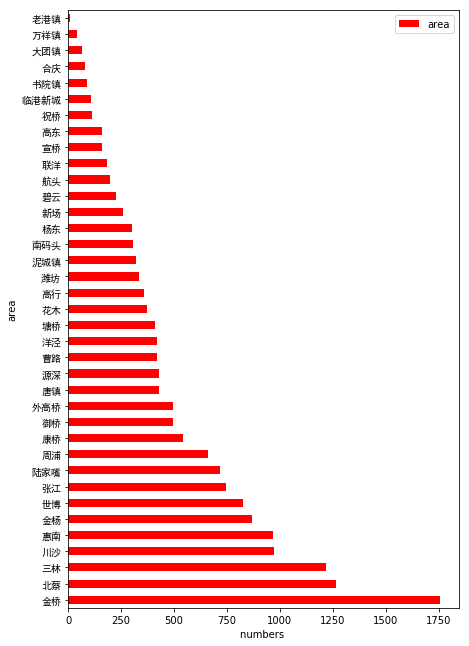

In [910]:
ax=frame_number_house.plot(x='区',y='房屋数',kind='barh',color = 'r',figsize=(7,11))
ax.set_yticklabels(frame_number_house["区"],fontproperties=myfont)
ax.legend(['area'])
ax.set_xlabel("numbers ")
ax.set_ylabel("area")

In [ ]:
###新房

In [787]:
headers={
    'User-Agent': "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36",
    'Host':'sh.fang.lianjia.com'
}

      


In [788]:
new_house_list=[]
for i in range (1, 64):
   link="https://sh.fang.lianjia.com/loupan/nhs1pg"+ str(i)
   r=requests.get(link,headers=headers)
   soup=BeautifulSoup(r.text,'lxml')
   house_detail_new=soup.find_all('div',class_='resblock-desc-wrapper')
   for each in house_detail_new:
    name=each.find('a', class_='name').text.strip()
    location=each.find('div', class_='resblock-location').text.strip()
    location=location.split("\n/\n")
    district=location[0]
    area=location[1]
    detail_loc=location[2]
    size=each.find('div', class_='resblock-area').text.strip()
    unit_price=each.find('span', class_='number').text.strip()
    new_house_list.append([name,district,area,detail_loc,size,unit_price])

In [789]:
len(new_house_list)

631

In [790]:
##存入 mongodb
housing_data_new = db.housing_data_new
for each in new_house_list:
   housing_data_new.insert_one({
    "楼盘名称":each[0],
    "面积":each[4],
    "单价（元/平米）":each[5],
    "地址":each[3],
    "具体地区":each[2],
    "所属区":each[1],
        
}
)

In [31]:
table=db['housing_data_new']
data_all_new=pd.DataFrame(list(table.find()))
data_all_new

,_id,具体地区,单价（元/平米）,地址,所属区,楼盘名称,面积
0,5cc4c5f3c15b9b2cd84f5d44,昆山,23000,绿地大道1299号,上海周边,苏河公园,建面 85-115㎡
1,5cc4c5f3c15b9b2cd84f5d45,嘉兴,16500,永丰桥港与嘉善塘交汇处,上海周边,旭辉公元城市,建面 66-110㎡
2,5cc4c5f3c15b9b2cd84f5d46,小昆山,35000,文翔路昆水街,松江,中海九峯里,建面 95-125㎡
3,5cc4c5f3c15b9b2cd84f5d47,嘉兴,18500,魏塘街道环北西路160号,上海周边,旭辉招商嘉樾府,建面 120-139㎡
4,5cc4c5f3c15b9b2cd84f5d48,昆山,25000,金变路与远国路交汇处,上海周边,香逸铂悦,建面 84-109㎡
5,5cc4c5f3c15b9b2cd84f5d49,昆山,18500,天盛路68号,上海周边,湖光里水秀庭院,建面 354-358㎡
6,5cc4c5f3c15b9b2cd84f5d4a,松江老城,55000,中山东路249号,松江,云间新天地,
7,5cc4c5f3c15b9b2cd84f5d4b,太仓,9700,龙江路588号,上海周边,合生伴海,建面 89-145㎡
8,5cc4c5f3c15b9b2cd84f5d4c,小昆山,33500,崇南公路499弄,松江,佘山院子东园,建面 70-89㎡
9,5cc4c5f3c15b9b2cd84f5d4d,小昆山,48000,崇南公路499弄,松江,佘山院子东园,建面 90-130㎡


In [913]:
number_house=[]
for each in x_axis:
    hh_unit=data_all_new.loc[data_all_new["所属区"] == each]
    a=len(hh_unit)
    number_house.append(a)

Text(0, 0.5, 'districts')

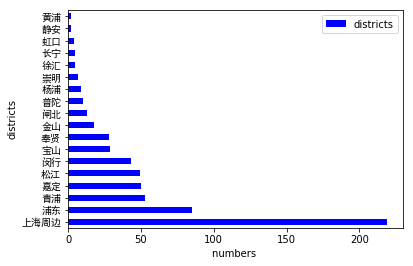

In [919]:
frame_number_house=pd.DataFrame(data=number_house,columns=['房屋数'])
frame_number_house["区"]=x_axis
frame_number_house=frame_number_house.sort_values(by="房屋数", ascending=False)
ax=frame_number_house.plot(x='区',y='房屋数',kind='barh',color = 'b')
ax.set_yticklabels(frame_number_house["区"],fontproperties=myfont)
ax.legend(['districts'])
ax.set_xlabel("numbers ")
ax.set_ylabel("districts")

In [920]:
frame_number_house

,房屋数,区
17,219,上海周边
0,85,浦东
13,53,青浦
8,50,嘉定
7,49,松江
1,43,闵行
2,29,宝山
14,28,奉贤
15,18,金山
11,13,闸北


In [40]:
hh_unit=data_all_new.loc[data_all_new["单价（元/平米）"] != "价格待定"]["单价（元/平米）"]

In [41]:
hh_unit_new=[]
hh_unit_new_2=[]
for each in hh_unit:
    a=int(each)
    hh_unit_new.append(a)
for each in hh_unit_new:
    if each <= 4000:
      continue
    else:
      hh_unit_new_2.append(each)

In [942]:
hh_unit_new_2

[23000,
 16500,
 35000,
 18500,
 25000,
 18500,
 55000,
 9700,
 33500,
 48000,
 18500,
 20000,
 29900,
 120000,
 24507,
 34850,
 11500,
 32000,
 115000,
 7500,
 41000,
 43000,
 33000,
 33000,
 22300,
 41000,
 38500,
 37000,
 56000,
 120000,
 90000,
 32000,
 32000,
 40000,
 62500,
 64000,
 31500,
 39000,
 4800,
 70000,
 140000,
 27500,
 26000,
 21700,
 28000,
 38000,
 34000,
 87000,
 6059,
 47000,
 118000,
 120000,
 72000,
 35000,
 30000,
 35000,
 20500,
 50000,
 66000,
 55000,
 31800,
 40000,
 70000,
 100000,
 23000,
 58000,
 75000,
 42000,
 27000,
 23000,
 14000,
 48000,
 42000,
 30000,
 25000,
 37800,
 18000,
 26000,
 19000,
 19000,
 25000,
 65000,
 180000,
 64000,
 25000,
 56700,
 50000,
 20500,
 90000,
 42500,
 55000,
 58000,
 140000,
 60000,
 39000,
 100000,
 29000,
 15000,
 10000,
 138000,
 86000,
 21000,
 61000,
 58300,
 49850,
 98000,
 38000,
 45000,
 16000,
 14000,
 54000,
 55000,
 120000,
 150000,
 34000,
 61000,
 38000,
 42000,
 73000,
 55000,
 24000,
 30000,
 37000,
 40000,

In [42]:

new=pd.DataFrame(hh_unit_new_2)
pd.set_option('display.float_format',lambda x : '%.2f' % x)
pd.DataFrame(status(new[0]))

,0
总数,574.00
最小值,4200.00
最小值位置,275.00
25%分位数,17125.00
中位数,34000.00
75%分位数,50000.00
均值,39807.47
最大值,190000.00
最大值位数,306.00
平均绝对偏差,21643.51


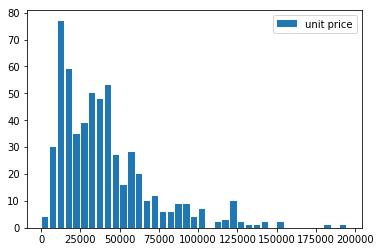

In [45]:
bins = np.arange(0, 200000, 5000)
plt.hist(hh_unit_new_2, bins, histtype='bar', label='unit price',rwidth=0.8)
plt.legend()


In [46]:
a=data_all_new.loc[data_all_new["所属区"] ==  '黄浦']
b=data_all_new.loc[data_all_new["所属区"] ==  '徐汇']
c=data_all_new.loc[data_all_new["所属区"] ==  '静安']
d=data_all_new.loc[data_all_new["所属区"] ==  '长宁']
e=data_all_new.loc[data_all_new["所属区"] ==  '虹口']
f=data_all_new.loc[data_all_new["所属区"] ==  '普陀']
g=data_all_new.loc[data_all_new["所属区"] ==  '杨浦']
a.append(b).append(c).append(d).append(e).append(f).append(g)


,_id,具体地区,单价（元/平米）,地址,所属区,楼盘名称,面积
42,5cc4c5f3c15b9b2cd84f5d6e,老西门,140000,西藏南路699弄,黄浦,复兴珑御,建面 178-183㎡
354,5cc4c5f4c15b9b2cd84f5ea6,黄浦滨江,121500,中华路518弄,黄浦,融创外滩壹号院,建面 293㎡
174,5cc4c5f4c15b9b2cd84f5df2,华泾,1756,华济路188弄,徐汇,融创领馆壹号院,建面 183-203㎡
269,5cc4c5f4c15b9b2cd84f5e51,徐汇滨江,130000,"凯滨路18弄, 凯滨路19弄, 东安路888弄",徐汇,尚海湾豪庭,建面 210-500㎡
304,5cc4c5f4c15b9b2cd84f5e74,龙华,120000,宛平南路1188弄,徐汇,中信君廷,建面 288㎡
328,5cc4c5f4c15b9b2cd84f5e8c,龙华,120000,宛平南路1188弄,徐汇,中信君廷,建面 288㎡
364,5cc4c5f4c15b9b2cd84f5eb0,龙华,93800,"宾南路19弄, 宾阳路18弄",徐汇,徐汇公园道壹号,建面 150㎡
374,5cc4c5f4c15b9b2cd84f5eba,曹家渡,129000,万航渡路398号,静安,九龙仓静安壹号,
408,5cc4c5f4c15b9b2cd84f5edc,江宁路,90000,海防路58弄,静安,静安康鑫家园,建面 119㎡
52,5cc4c5f3c15b9b2cd84f5d78,西郊,6059,金浜路188弄,长宁,复地御西郊,建面 480㎡


In [32]:
#####################租房
districts_pudong=['yuqiao1','beicai', 'biyun', 'caolu', 'chuansha', 'datuanzhen','geqing','gaohang','gaodong','huamu','hangtou','huinan'
          ,'jinqiao','jinyang','kangqiao','lujiazui','laogangzhen','lingangxincheng','lianyang','nichengzhen','nanmatou'
          ,'sanlin','shibo','shuyuanzhen','tangqiao','tangzhen','waigaoqiao','wanxiangzhen','weifang','xuanqiao','xinchang'
          ,'yangdong','yuanshen','yangjing','zhangjiang','zhuqiao','zhoupu']
other_disticts=['jingan','xuhui','huangpu','changning','putuo','baoshan','zhabei','hongkou','yangpu','minhang','jinshan',
               'jiading','chongming','fengxian','songjiang','qingpu']

In [777]:
headers={
    'User-Agent': "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36",
    'Host':'sh.lianjia.com'
}
data_list_rent=[]
for district in districts_pudong:
   link="https://sh.lianjia.com/zufang/"+district
   r=requests.get(link,headers=headers)
   soup=BeautifulSoup(r.text,'lxml')
   page = int(eval(soup.find('div',{'class':'content__pg'})['data-totalpage']))
   for i in range (1, page+1):
      link="https://sh.lianjia.com/zufang/"+ str(district) +"/pg"+ str(i)+ "/"
      r=requests.get(link,headers=headers)
      soup1=BeautifulSoup(r.text,'lxml')
      house_detail_2=soup.find_all('div',class_='content__list--item')
      for each in house_detail_2:
       name=each.find('p', class_='content__list--item--title twoline').text.strip()
       many_info=each.find('p', class_='content__list--item--des').text.strip().split("-")
       district=many_info[0]
       other_info=many_info[1].split("\n ")
       area=other_info[0].strip("").strip("\n/")
       size=other_info[1].strip(" ").strip("\n/").strip("㎡")
       arrange=other_info[3].strip("  ").strip("\n/").strip("  ") 
       rent=each.find('span', class_='content__list--item-price').text.strip().strip(" 元/月")
       data_list_rent.append([name,district,area,size,arrange,rent])
      

In [783]:
len(data_list_rent)

6926

In [791]:
headers={
    'User-Agent': "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36",
    'Host':'sh.lianjia.com'
}
data_list_rent_2=[]
for district in other_disticts:
   link="https://sh.lianjia.com/zufang/"+district
   r=requests.get(link,headers=headers)
   soup=BeautifulSoup(r.text,'lxml')
   page = int(eval(soup.find('div',{'class':'content__pg'})['data-totalpage']))
   for i in range (1, page+1):
      link="https://sh.lianjia.com/zufang/"+ str(district) +"/pg"+ str(i)+ "/"
      r=requests.get(link,headers=headers)
      soup1=BeautifulSoup(r.text,'lxml')
      house_detail_2=soup.find_all('div',class_='content__list--item')
      for each in house_detail_2:
       name=each.find('p', class_='content__list--item--title twoline').text.strip()
       many_info=each.find('p', class_='content__list--item--des').text.strip().split("-")
       district=many_info[0]
       other_info=many_info[1].split("\n ")
       area=other_info[0].strip("").strip("\n/")
       size=other_info[1].strip(" ").strip("\n/").strip("㎡")
       arrange=other_info[3].strip("  ").strip("\n/").strip("  ") 
       rent=each.find('span', class_='content__list--item-price').text.strip().strip(" 元/月")
       data_list_rent_2.append([name,district,area,size,arrange,rent])

In [792]:
len(data_list_rent_2)

18306

In [795]:
a=pd.DataFrame(data_list_rent)
b=pd.DataFrame(data_list_rent_2)
data_list_rent_all=a.append(b)
data_list_rent_all=np.array(data_list_rent_all)
data_list_rent_all=data_list_rent_all.tolist()
len(data_list_rent_all)

25232

In [988]:
##存入 mongodb
housing_data_rent = db.housing_data_rent
for each in data_list_rent_all:
   housing_data_rent.insert_one({
    "楼盘名称":each[0],
    "面积":int(each[3]),
    "租金":int(each[5]),
    "房型":each[4],
    "具体地区":each[2],
    "所属区":each[1],
        
}
)

In [33]:
table=db['housing_data_rent']
data_all_rent=pd.DataFrame(list(table.find()))
data_all_rent

,_id,具体地区,房型,所属区,楼盘名称,租金,面积
0,5cc59d45c15b9b2cd85024db,御桥,2室1厅1卫,浦东,京浦小区经典两房，11号线御桥站，家具家电齐全急租,4500,53
1,5cc59d45c15b9b2cd85024dc,御桥,2室2厅1卫,浦东,整租 · 精装整租 近地铁口 拎包入住,5200,65
2,5cc59d45c15b9b2cd85024dd,御桥,1室1厅1卫,浦东,地杰一房，电梯房，好楼层采光好，诚意出租,4000,56
3,5cc59d45c15b9b2cd85024de,御桥,3室2厅2卫,浦东,地杰全明三房，家具家电可配新装修，长租可议价,9000,145
4,5cc59d45c15b9b2cd85024df,御桥,2室2厅1卫,浦东,整租 · 南北通透，采光好， 精装两房，全新家具，拎包入住,5800,92
5,5cc59d45c15b9b2cd85024e0,御桥,3室2厅1卫,浦东,万科海上传奇 3室2厅 9500元,9500,105
6,5cc59d45c15b9b2cd85024e1,御桥,2室2厅1卫,浦东,新出两房 精装全配 拎包入住 价格便宜 抢手房源,5600,89
7,5cc59d45c15b9b2cd85024e2,御桥,3室2厅2卫,浦东,地杰国际城精装大三房带车位拎包入住,9200,139
8,5cc59d45c15b9b2cd85024e3,御桥,2室1厅1卫,浦东,"11号线御桥站,家具家电齐，有钥匙，诚意出租",4300,53
9,5cc59d45c15b9b2cd85024e4,御桥,1室1厅1卫,浦东,地铁口一房，电梯房，精装全配，诚意出租,4000,56


In [34]:

new=data_all_rent["租金"]
new=pd.DataFrame(new)
pd.set_option('display.float_format',lambda x : '%.2f' % x)
pd.DataFrame(status(new["租金"]))

,0
总数,25232.00
最小值,1000.00
最小值位置,4181.00
25%分位数,4000.00
中位数,6300.00
75%分位数,10000.00
均值,8282.39
最大值,85000.00
最大值位数,3243.00
平均绝对偏差,4620.91


In [35]:
new=data_all_rent["面积"]
new=pd.DataFrame(new)
pd.set_option('display.float_format',lambda x : '%.2f' % x)
pd.DataFrame(status(new["面积"]))

,0
总数,25232.00
最小值,14.00
最小值位置,3624.00
25%分位数,59.00
中位数,87.00
75%分位数,116.00
均值,94.70
最大值,1213.00
最大值位数,6443.00
平均绝对偏差,35.81


In [36]:
data_all_rent.loc[data_all_rent["租金"] < 3000]

,_id,具体地区,房型,所属区,楼盘名称,租金,面积
634,5cc59d45c15b9b2cd8502755,川沙,1室1厅1卫,浦东,施湾家园 一室一厅 近机场 沃尔玛,2000,57
640,5cc59d45c15b9b2cd850275b,川沙,1室1厅1卫,浦东,施镇公寓毛坯一房可做两房价格实惠,1500,56
641,5cc59d45c15b9b2cd850275c,川沙,2室2厅1卫,浦东,思凡花苑六街坊 2室2厅 2600元,2600,98
644,5cc59d45c15b9b2cd850275f,川沙,3室2厅2卫,浦东,思凡馨院，三室两厅，毛坯三房，采光明亮。,2000,120
645,5cc59d45c15b9b2cd8502760,川沙,1室1厅1卫,浦东,园西二居 1室1厅 2600元,2600,47
651,5cc59d45c15b9b2cd8502766,川沙,2室2厅1卫,浦东,思凡馨苑 两室毛坯 采光明亮，近浦东机场。,1700,81
653,5cc59d45c15b9b2cd8502768,川沙,2室1厅1卫,浦东,西泥路小区，简装小两房，家具家电齐全,2800,56
655,5cc59d45c15b9b2cd850276a,川沙,2室1厅1卫,浦东,晴川佳苑整租79平两室户低楼层,2800,79
656,5cc59d45c15b9b2cd850276b,川沙,2室2厅1卫,浦东,思凡馨苑，两室两厅，南北通透，近浦东机场。,1700,81
657,5cc59d45c15b9b2cd850276c,川沙,1室1厅1卫,浦东,施湾家园，一室一厅一厨一卫，近沃尔玛。,1300,48


In [1031]:
data_all_rent.loc[data_all_rent["租金"] > 20000]

,_id,具体地区,房型,所属区,楼盘名称,租金,面积
165,5cc59d45c15b9b2cd8502580,北蔡,4室3厅4卫,浦东,整租 · 如果您有经济实力，何不选择这套豪.宅呢?,48000,243
168,5cc59d45c15b9b2cd8502583,北蔡,3室3厅3卫,浦东,整租 · 品质生活，舒适宜居，业主诚意出租,38000,220
171,5cc59d45c15b9b2cd8502586,北蔡,4室2厅4卫,浦东,园林式小区，品质般生活，舒适宜居，业主低价出租,46000,340
195,5cc59d45c15b9b2cd850259e,北蔡,4室3厅4卫,浦东,整租 · 如果您有经济实力，何不选择这套豪.宅呢?,48000,243
198,5cc59d45c15b9b2cd85025a1,北蔡,3室3厅3卫,浦东,整租 · 品质生活，舒适宜居，业主诚意出租,38000,220
201,5cc59d45c15b9b2cd85025a4,北蔡,4室2厅4卫,浦东,园林式小区，品质般生活，舒适宜居，业主低价出租,46000,340
225,5cc59d45c15b9b2cd85025bc,北蔡,4室3厅4卫,浦东,整租 · 如果您有经济实力，何不选择这套豪.宅呢?,48000,243
228,5cc59d45c15b9b2cd85025bf,北蔡,3室3厅3卫,浦东,整租 · 品质生活，舒适宜居，业主诚意出租,38000,220
231,5cc59d45c15b9b2cd85025c2,北蔡,4室2厅4卫,浦东,园林式小区，品质般生活，舒适宜居，业主低价出租,46000,340
255,5cc59d45c15b9b2cd85025da,北蔡,4室3厅4卫,浦东,整租 · 如果您有经济实力，何不选择这套豪.宅呢?,48000,243


Text(0.5, 1.0, 'Distribution of the price for renting')

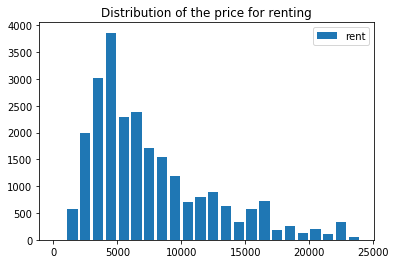

In [1007]:
hh_unit=data_all_rent["租金"]
bins = np.arange(0, 25000, 1000)
plt.hist(hh_unit, bins, histtype='bar', label='rent',rwidth=0.8)
plt.legend()
plt.title('Distribution of the price for renting')

Text(0.5, 1.0, 'Distribution of the size for renting')

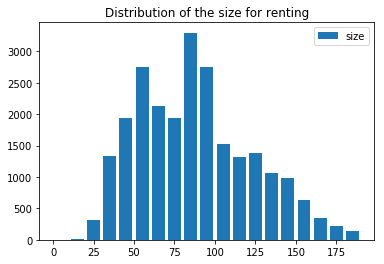

In [1009]:
hh_unit=data_all_rent["面积"]
bins = np.arange(0, 200, 10)
plt.hist(hh_unit, bins, histtype='bar', label='size',rwidth=0.8)
plt.legend()
plt.title('Distribution of the size for renting')

Text(0.5, 1.0, 'Rent')

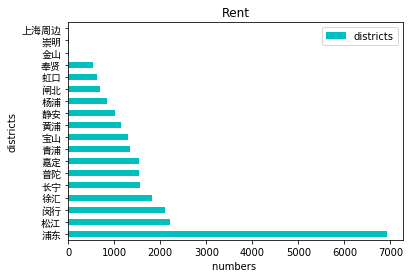

In [1000]:
number_house=[]
for each in x_axis:
    hh_unit=data_all_rent.loc[data_all_rent["所属区"] == each]
    a=len(hh_unit)
    number_house.append(a)
frame_number_house=pd.DataFrame(data=number_house,columns=['房屋数'])
frame_number_house["区"]=x_axis
frame_number_house=frame_number_house.sort_values(by="房屋数", ascending=False)
ax=frame_number_house.plot(x='区',y='房屋数',kind='barh',color = 'c')
ax.set_yticklabels(frame_number_house["区"],fontproperties=myfont)
ax.legend(['districts'])
ax.set_xlabel("numbers ")
ax.set_ylabel("districts")
ax.set_title("Rent")

Text(0.5, 1.0, 'Rent')

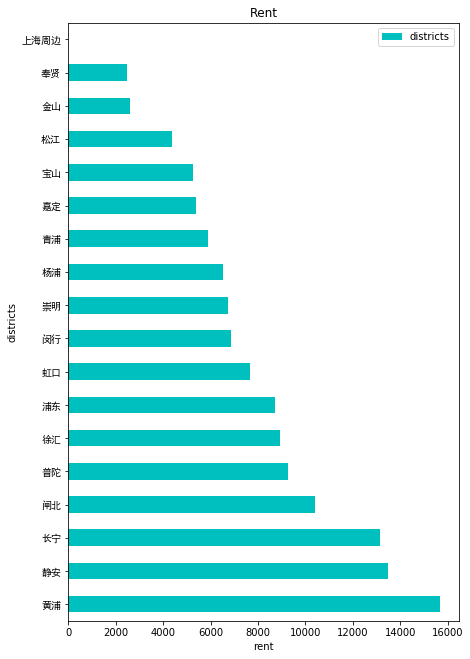

In [37]:
districts_unit=[]
for each in x_axis:
    hh_unit=data_all_rent.loc[data_all_rent["所属区"] == each]["租金"]
    districts_unit.append(hh_unit.mean())
frame_districts=pd.DataFrame(data=districts_unit,columns=['单价'])
frame_districts["地区"]=x_axis###添加一行
frame_districts=frame_districts.sort_values(by="单价", ascending=False)
ax=frame_districts.plot(x='地区',y='单价',kind='barh',color = 'c',figsize=(7,11),linewidth=0.01)
ax.set_yticklabels(frame_districts["地区"],fontproperties=myfont)
ax.legend(['districts'])
ax.set_xlabel("rent")
ax.set_ylabel("districts")
ax.set_title("Rent")

In [38]:
frame_districts

,单价,地区
9,15685.00,黄浦
10,13473.33,静安
6,13126.67,长宁
11,10386.67,闸北
4,9276.67,普陀
3,8916.67,徐汇
0,8706.98,浦东
12,7651.67,虹口
1,6863.33,闵行
16,6754.55,崇明


Text(0.5, 1.0, 'Rent')

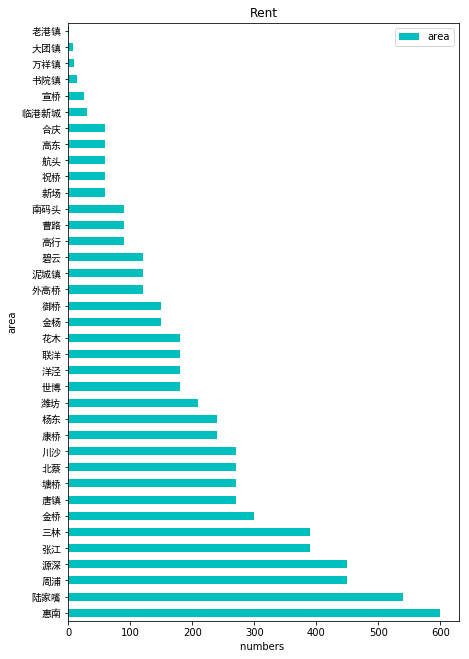

In [48]:
##############pudong


number_house=[]
for each in x_axis_pudong:
    hh_unit=data_all_rent.loc[data_all_rent["具体地区"] == each]
    a=len(hh_unit)
    number_house.append(a)
frame_number_house=pd.DataFrame(data=number_house,columns=['房屋数'])
frame_number_house["区"]=x_axis_pudong
frame_number_house=frame_number_house.sort_values(by="房屋数", ascending=False)
ax=frame_number_house.plot(x='区',y='房屋数',kind='barh',color = 'c',figsize=(7,11))
ax.set_yticklabels(frame_number_house["区"],fontproperties=myfont)
ax.legend(['area'])
ax.set_xlabel("numbers ")
ax.set_ylabel("area")
ax.set_title("Rent")

Text(0, 0.5, 'area')

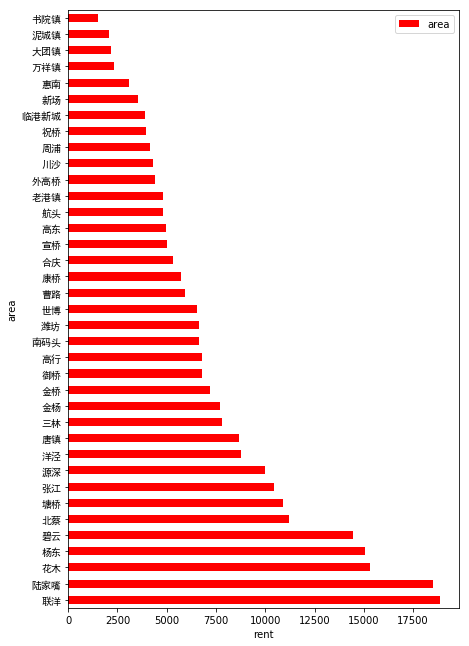

In [49]:
districts_unit=[]
for each in x_axis_pudong:
    hh_unit=data_all_rent.loc[data_all_rent["具体地区"] == each]["租金"]
    districts_unit.append(hh_unit.mean())
frame_districts=pd.DataFrame(data=districts_unit,columns=['单价'])
frame_districts["地区"]=x_axis_pudong###添加一行
frame_districts=frame_districts.sort_values(by="单价", ascending=False)
ax=frame_districts.plot(x='地区',y='单价',kind='barh',color = 'r',figsize=(7,11),linewidth=0.01)
ax.set_yticklabels(frame_districts["地区"],fontproperties=myfont)
ax.legend(['area'])
ax.set_xlabel("rent")
ax.set_ylabel("area")


In [ ]:
##################对比

In [ ]:
###租售比

In [1040]:
new=data_all["总价（万）"]
new=pd.DataFrame(new)
pd.set_option('display.float_format',lambda x : '%.2f' % x)
pd.DataFrame(status(new["总价（万）"]))

,0
总数,67419.00
最小值,18.00
最小值位置,52998.00
25%分位数,250.00
中位数,365.00
75%分位数,620.00
均值,557.21
最大值,60000.00
最大值位数,55886.00
平均绝对偏差,354.33


In [1041]:
data_all.loc[data_all["总价（万）"] < 100]

,_id,具体地区,单价（元/平米）,总价（万）,房型,所属区,楼盘名称,状况,装修,面积
2511,5cc35002c15b9b2cd84d596a,川沙,30275.00,95.00,1室1厅,浦东,思凡花苑六街坊,低楼层(共6层)1997年建板楼,毛坯,31.38
3403,5cc35002c15b9b2cd84d5ce6,大团镇,18182.00,80.00,1室1厅,浦东,南湾新村,中楼层(共5层)1999年建板楼,简装,44
3407,5cc35002c15b9b2cd84d5cea,大团镇,15282.00,98.00,3室1厅,浦东,南湾新村,高楼层(共5层)1988年建板楼,简装,64.13
3415,5cc35002c15b9b2cd84d5cf2,大团镇,17170.00,82.00,2室1厅,浦东,南湾新村,高楼层(共4层)1984年建板楼,简装,47.76
3436,5cc35002c15b9b2cd84d5d07,大团镇,13534.00,90.00,2室1厅,浦东,南湾新村,高楼层(共5层)2002年建板楼,毛坯,66.5
3437,5cc35002c15b9b2cd84d5d08,大团镇,18409.00,90.00,2室1厅,浦东,南湾新村,中楼层(共5层)1983年建板楼,精装,48.89
4558,5cc35002c15b9b2cd84d6169,航头,15257.00,90.00,2室1厅,浦东,亿联中心,中楼层(共17层)2010年建塔楼,其他,58.99
4571,5cc35002c15b9b2cd84d6176,航头,13925.00,66.00,1室1厅,浦东,亿联中心,高楼层(共18层)板楼,其他,47.4
4857,5cc35003c15b9b2cd84d6294,惠南,24737.00,94.00,1室1厅,浦东,工农新村(惠南),高楼层(共5层)1981年建板楼,简装,38
5405,5cc35003c15b9b2cd84d64b8,惠南,15632.00,80.00,1室1厅,浦东,龙源星城,中楼层(共6层)2001年建板楼,毛坯,51.18


In [1042]:
data_all.loc[data_all["总价（万）"] > 5000]

,_id,具体地区,单价（元/平米）,总价（万）,房型,所属区,楼盘名称,状况,装修,面积
1496,5cc35002c15b9b2cd84d5573,北蔡,106413.00,5199.00,5室3厅,浦东,浦东星河湾,低楼层(共18层)2010年建板楼,精装,488.57
1911,5cc35002c15b9b2cd84d5712,碧云,86119.00,6999.00,独栋别墅,浦东,百富丽山庄,3层2004年建板楼,南,9室2厅
1930,5cc35002c15b9b2cd84d5725,碧云,130752.00,5300.00,独栋别墅,浦东,云间绿大地,2层2005年建板楼,东南,5室3厅
1932,5cc35002c15b9b2cd84d5727,碧云,86131.00,7000.00,独栋别墅,浦东,百富丽山庄,3层2000年建板楼,南,8室3厅
1933,5cc35002c15b9b2cd84d5728,碧云,243522.00,12000.00,独栋别墅,浦东,云间绿大地,2层2005年建板楼,南,7室3厅
1942,5cc35002c15b9b2cd84d5731,碧云,172691.00,7000.00,独栋别墅,浦东,云间绿大地,2层2005年建板楼,南,5室3厅
1949,5cc35002c15b9b2cd84d5738,碧云,164635.00,8100.00,独栋别墅,浦东,云间绿大地,2层2005年建板楼,北,5室3厅
1955,5cc35002c15b9b2cd84d573e,碧云,136643.00,5500.00,独栋别墅,浦东,百富丽山庄,3层1998年建板楼,南,6室2厅
1963,5cc35002c15b9b2cd84d5746,碧云,85616.00,5800.00,独栋别墅,浦东,世茂湖滨花园(别墅),3层2003年建板楼,西南,5室2厅
1985,5cc35002c15b9b2cd84d575c,碧云,221902.00,6000.00,独栋别墅,浦东,云间绿大地,2层板楼,南,4室2厅


In [ ]:
3650000##买zhongweishu
6300*12##租房  zhongweishu

In [1044]:
3650000/(6300*12)###平均租售比

48.28042328042328

In [1076]:
x_axis_2=["浦东","闵行","宝山","徐汇","普陀","杨浦","长宁","松江","嘉定","黄浦","静安","闸北","虹口","青浦","奉贤","金山","崇明"]


buy_price=[]
for each in x_axis_2:
    hh_unit=data_all.loc[data_all["所属区"] == each]
    a=pd.DataFrame(hh_unit["总价（万）"])
    b=a["总价（万）"].median()
    buy_price.append(b)
    
rent_price=[]
for each2 in x_axis_2:
    hh_unit=data_all_rent.loc[data_all_rent["所属区"] == each2]
    a=pd.DataFrame(hh_unit["租金"])
    b=a["租金"].median()
    rent_price.append(b)
bb=[]
for i in range (0,17):
 aa=buy_price[i]*10000/(rent_price[i]*12)
 bb.append(aa)

Text(0.5, 1.0, 'price to rent ratio in Shanghai')

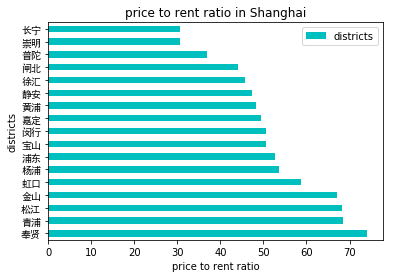

In [1093]:
buy_rent=pd.DataFrame(data=bb,columns=['租售比'])
buy_rent["区"]=x_axis_2
buy_rent=buy_rent.sort_values(by="租售比", ascending=False)
ax=buy_rent.plot(x='区',y='租售比',kind='barh',color = 'c')
ax.set_yticklabels(buy_rent["区"],fontproperties=myfont)
ax.legend(['districts'])
ax.set_xlabel("price to rent ratio")
ax.set_ylabel("districts")
ax.set_title("price to rent ratio in Shanghai")

In [1092]:
buy_rent

,租售比,区
14,74.07,奉贤
13,68.38,青浦
7,68.29,松江
15,67.03,金山
12,58.62,虹口
5,53.52,杨浦
0,52.78,浦东
2,50.65,宝山
1,50.52,闵行
8,49.48,嘉定
